## Scipy: Numpy, Pandas, Matplotlib

<br>
University of Miami
<br>
REU summer 2022
<br>
Burton Rosenberg.
<br>
<br>last update: May 26, 2022


What is _Pandas_? Pandas is a Python library for the handling and curation of data.

What is _Numpy_? Numpy is a Python library that implements vectorized, numerical computation.

https://numpy.org/doc/stable/reference/index.html

https://www.kaggle.com/datasets/aungpyaeap/fish-market?resource=download&select=Fish.csv

__Panda's can read in a csv File__

In [1]:
import pandas as pd
import numpy as np

fish = pd.read_csv('./Fish.csv')
type(fish)

pandas.core.frame.DataFrame

You can then take a quick look at the DataFrame object, using `head`

In [2]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


The DataFrame is made up of DataSeries objects, each labeled by the column.

In [3]:
for c in fish.columns:
    print(f'|{c}|')

type(fish['Width'])

|Species|
|Weight|
|Length1|
|Length2|
|Length3|
|Height|
|Width|


pandas.core.series.Series

And each Series has a numpy ndarray of data, to look at or manipulate.

In [4]:
print(fish['Weight'].head())

type(fish['Weight'].values)

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


numpy.ndarray

And we can do standard numpy things to the ndarray.

In [5]:
np.mean(fish['Weight']), np.std(fish['Weight'])

(398.3264150943396, 356.85082298949595)

In [6]:
for c in fish.columns:
    if c=='Species':
        continue
    d_s = fish[c]  # a pd.DataSeries object
    print(f'{c}:\n\tmean={np.mean(d_s.values):.4f}\n\tstd={np.std(d_s.values):.4f}')
    
    

Weight:
	mean=398.3264
	std=356.8508
Length1:
	mean=26.2472
	std=9.9650
Length2:
	mean=28.4157
	std=10.6826
Length3:
	mean=31.2270
	std=11.5737
Height:
	mean=8.9710
	std=4.2727
Width:
	mean=4.4175
	std=1.6805


### Grouping



In [7]:
f_gb = fish.groupby('Species')
f_gb.mean()


,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


In [8]:
f_gb.std()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,209.205709,3.593699,3.911925,4.157866,1.964707,0.721509
Parkki,78.755086,3.284841,3.557348,3.959155,1.615650,0.643347
Perch,347.617717,8.561572,9.021668,9.529509,2.878177,1.774626
Pike,494.140765,9.029087,9.714116,10.167426,1.664228,1.140269
Roach,88.828916,3.459917,3.651946,4.031599,1.261192,0.690371
Smelt,4.131526,1.216372,1.432147,1.426457,0.351780,0.286611
Whitefish,309.602972,5.580681,5.723781,6.023759,1.830201,1.194258


### Numpy

The Series objects ultimately include an array of numbers as a Numpy object, called an ndarray. Ndarrays are stored and manipulated efficiently in memeory because they are C language arrays, not lists. They are additional features,

- Two ndarrays can operate on each other componentwise. 
- Operations between ndarrays use broadcasting to prepare ndarrays to be operated on componentwise
- Ufuncts can vectorize the application of a function to every element in the array.

The ndarray in the Series is its `values` property; however in many cases the Series itself can be presented and the calculation will understand to work on the values property. 

As examples of the three features mentioned, 

- When ndarrays `v` and `w` are combined as `v + w` it is understood as `v[i]+w[i]` for all `i`.
- Whan a scalar `x` is applied to a vector `v`, the scare is expanded by repeating the value x until it has the shape of the vector. Hence `x * v` is understood as `x * v[i]` for all `i`.
- In an operation on vector `v` such as `v**2`, it is a unfunct that applies squaring to each element; hence it is understood as `v[i]**2` for all `i`.

In [9]:
import math

perch_weight_ds = fish['Weight'][f_gb.groups['Perch']]
m = np.mean(perch_weight_ds)
s = math.sqrt(np.sum((perch_weight_ds - m)**2)/(len(perch_weight_ds)-1))
print(f'Perce: mean = {m:.4f}, standard deviation = {s:.4f}')

Perce: mean = 382.2393, standard deviation = 347.6177


### Linear regression

In [10]:
p_h_ds = fish['Height'][f_gb.groups['Perch']]
p_w_ds = fish['Weight'][f_gb.groups['Perch']]

for i in range(len(p_h_ds)):
    print(i,p_w_ds.values[i],p_h_ds.values[i])

0 5.9 2.112
1 32.0 3.528
2 40.0 3.824
3 51.5 4.5924
4 70.0 4.588
5 100.0 5.2224
6 78.0 5.1992
7 80.0 5.6358
8 85.0 5.1376
9 85.0 5.082
10 110.0 5.6925
11 115.0 5.9175
12 125.0 5.6925
13 130.0 6.384
14 120.0 6.11
15 120.0 5.64
16 130.0 6.11
17 135.0 5.875
18 110.0 5.5225
19 130.0 5.856
20 150.0 6.792
21 145.0 5.9532
22 150.0 5.2185
23 170.0 6.275
24 225.0 7.293
25 145.0 6.375
26 188.0 6.7334
27 180.0 6.4395
28 197.0 6.561
29 218.0 7.168
30 300.0 8.323
31 260.0 7.1672
32 265.0 7.0516
33 250.0 7.2828
34 250.0 7.8204
35 300.0 7.5852
36 320.0 7.6156
37 514.0 10.03
38 556.0 10.2565
39 840.0 11.4884
40 685.0 10.881
41 700.0 10.6091
42 700.0 10.835
43 690.0 10.5717
44 900.0 11.1366
45 650.0 11.1366
46 820.0 12.4313
47 850.0 11.9286
48 900.0 11.73
49 1015.0 12.3808
50 820.0 11.135
51 1100.0 12.8002
52 1000.0 11.9328
53 1100.0 12.5125
54 1000.0 12.604
55 1000.0 12.4888


In [11]:
h_zero = p_h_ds.values - np.mean(p_h_ds.values)
w_zero = p_w_ds.values - np.mean(p_w_ds.values)
dot_h_w = np.sum(h_zero*w_zero)
covar = dot_h_w/len(p_h_ds.values)

pearson_r = covar/(np.std(p_h_ds.values)*np.std(p_w_ds.values))

print(pearson_r)

0.9684406904743867


In [12]:
m = pearson_r * np.std(p_h_ds.values)/np.std(p_w_ds.values)
b = np.mean(p_h_ds.values) - m * np.mean(p_w_ds.values)

for i in range(len(p_h_ds)):
    print(f'exp {i}: obs: {p_h_ds.values[i]:.4f} pred: {m*p_w_ds.values[i]+b:.4f}')

exp 0: obs: 2.1120 pred: 4.8442
exp 1: obs: 3.5280 pred: 5.0535
exp 2: obs: 3.8240 pred: 5.1177
exp 3: obs: 4.5924 pred: 5.2099
exp 4: obs: 4.5880 pred: 5.3582
exp 5: obs: 5.2224 pred: 5.5988
exp 6: obs: 5.1992 pred: 5.4224
exp 7: obs: 5.6358 pred: 5.4384
exp 8: obs: 5.1376 pred: 5.4785
exp 9: obs: 5.0820 pred: 5.4785
exp 10: obs: 5.6925 pred: 5.6789
exp 11: obs: 5.9175 pred: 5.7190
exp 12: obs: 5.6925 pred: 5.7992
exp 13: obs: 6.3840 pred: 5.8393
exp 14: obs: 6.1100 pred: 5.7591
exp 15: obs: 5.6400 pred: 5.7591
exp 16: obs: 6.1100 pred: 5.8393
exp 17: obs: 5.8750 pred: 5.8794
exp 18: obs: 5.5225 pred: 5.6789
exp 19: obs: 5.8560 pred: 5.8393
exp 20: obs: 6.7920 pred: 5.9997
exp 21: obs: 5.9532 pred: 5.9596
exp 22: obs: 5.2185 pred: 5.9997
exp 23: obs: 6.2750 pred: 6.1600
exp 24: obs: 7.2930 pred: 6.6011
exp 25: obs: 6.3750 pred: 5.9596
exp 26: obs: 6.7334 pred: 6.3044
exp 27: obs: 6.4395 pred: 6.2402
exp 28: obs: 6.5610 pred: 6.3765
exp 29: obs: 7.1680 pred: 6.5449
exp 30: obs: 8.3230 

## Matplotlib

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

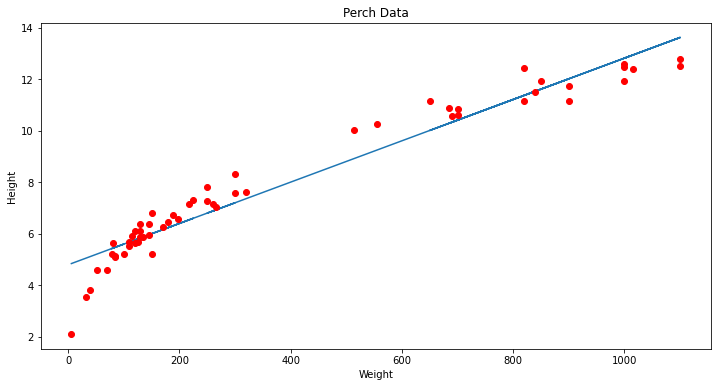

In [14]:

plt.figure(figsize=(12, 6))

plt.plot(p_w_ds.values, m*p_w_ds.values+b)     # regression line
plt.plot(p_w_ds.values, p_h_ds.values, 'ro')   # scatter plot showing actual data
plt.title('Perch Data')
plt.xlabel('Weight')
plt.ylabel('Height')

plt.show()